# Continuous Probability and Normal Distribution

## Characteristics

+ The normal curve is bell-shaped and has a single peak at the exact centre of the distribution.
+ The normal distribution is symmetrical about its mean. 
  +  That is, the arithmetic mean, median, and mode of the distribution are equal and located at the peak. 
+ The normal probability distribution is asymptotic. 
+ The location is determined by the mean, μ. The dispersion or spread is determined by the standard deviation, σ.

$$ z = \frac{x - \mu}{\sigma} $$

# Parametric or Gaussian Value At Risk 

As we did when computing the Empirical Value at Risk, we want to compute the worst possible outcome for a given risk level. For the Empirical model we calculated the VAR based on quantiles from historical returns. For computing the Parametric or Gaussian VAR, we assume that the returns are normally distributed, and we infer the mean and standard deviation.

### Assets

Last keep with the same ETFs, that will represent different assets classes with different risks.

- TIP: reflects a portfolio of U.S. Treasury bonds
- HYB: reflects a portfolio of U.S. high yield corporate bonds
- IVV: reflects the S&P 500 U.S. stock market index
- EWZ: reflects a Brazillian stock market index

### Collecting the Data

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np

plt.style.use('fivethirtyeight')

securities = ['TIP', 'HYB', 'IVV', 'EWZ']

def getPortfData(securities):
    '''
    The function gets a dictionary as input and calculates the historical return of the porfolio chosen
    '''
    basket_returns = []
    
    for asset in securities:
        security = yf.Ticker(asset).history(period="max")
        returns = security['Close'].pct_change().dropna()
        basket_returns.append(returns)

    hist_returns = pd.concat(basket_returns, 1)
    hist_returns.columns = securities
    hist_returns = hist_returns.dropna()
        
    return hist_returns

data = getPortfData(securities)

<AxesSubplot:title={'center':'Accumulated Return'}, xlabel='Date'>

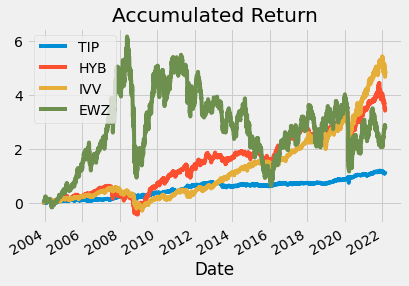

In [2]:
((data+1).cumprod()-1).plot(title = "Accumulated Return")

### Infering the Parameters

In order to keep things simple, we are going to infer the mean and standard deviation based on the historical data.

**Note that the mean and standard deviation are based on daily returns**

### Defining main function

In [3]:
def par_var(returns, risk_level=5):
    '''
    Based on a mean, standard deviation and risk level, it computes the parametrical Value At Risk
    '''
    from scipy.stats import norm
    
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(risk_level/100)
    return -(returns.mean() + z*returns.std(ddof=0))    


In [4]:
par_var(data)

TIP    0.006152
HYB    0.020599
IVV    0.019031
EWZ    0.039462
dtype: float64

### Visualizing

Let's plot the distribution of the returns based on our infered parameters, and we will plot horizontal lines representing the Parametric VARs. We will also keep the plot in the same x scale, in order to make easier to compare the results.

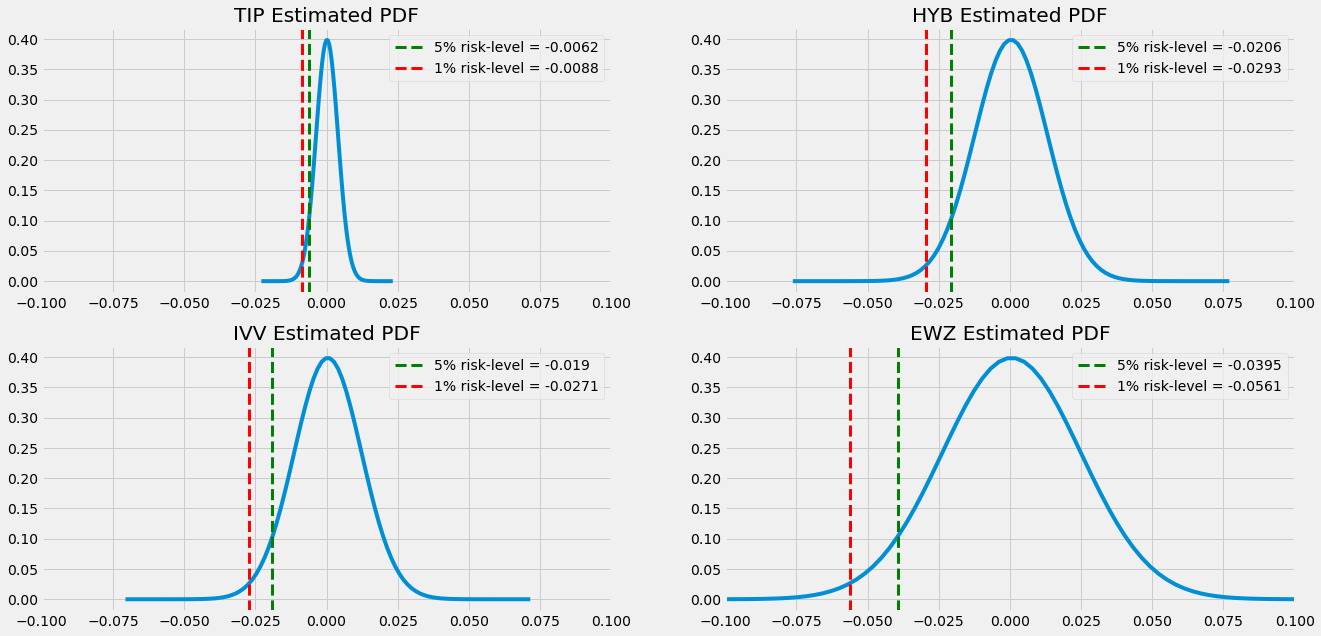

In [129]:
from scipy.stats import norm

plt.figure(figsize=(20, 10))

labels = ['5% risk-level = ', '1% risk-level = ']
colours = ['green', 'red']

i = 1
for column in data:
    
    sigma = data[column].std()
    mean =  data[column].mean()
    z = np.linspace(-6, 6, 100)
    p_x = norm.pdf(z)
    z = z*sigma + mean

    plt.subplot(int(f'22{i}')).plot(z, p_x)
    plt.xlim(( -0.10, 0.10))
    plt.title(column + ' Estimated PDF')
    quantiles = (-par_var(data[column], 5), -par_var(data[column], 1))
    for k in range(2):
        plt.axvline(x=quantiles[k], color = colours[k], label = labels[k] + str(round(quantiles[k], 4)), linestyle = "dashed", linewidth = 3 )
    plt.legend()
    i = 1 + i

### Conclusion

As we would expect, the least risk asset is the portfolio of USA Bonds, and the riskier asset is the ETF that represents the Brazillian stock market index.